# Small Size Frozen Lake

In [371]:
# figsize
size = (10, 6)


In [372]:
import numpy as np
import gym
from gym import wrappers
import time
import sys
import matplotlib.pyplot as plt


In [373]:
import hiive.mdptoolbox as mdptoolbox
import hiive.mdptoolbox.example


In [374]:
def directions_lake():
	# return {
	# 	3: '⬆',
	# 	2: '➡',
	# 	1: '⬇',
	# 	0: '⬅'
	# }
	return {0: '←', 1: '↓', 2: '→', 3: '↑'}
	# return {0: '', 1: '', 2: '', 3: ''}


def colors_lake():
	return {
		b'S': 'green',
		b'F': 'skyblue',
		b'H': 'black',
		b'G': 'gold',
	}


def plot_policy_map(title, policy, map_desc, color_map, direction_map):
	fig = plt.figure()
	ax = fig.add_subplot(111, xlim=(
		0, policy.shape[1]), ylim=(0, policy.shape[0]))
	font_size = 'x-large'
	if policy.shape[1] > 16:
		font_size = 'small'
	plt.title(title)
	for i in range(policy.shape[0]):
		for j in range(policy.shape[1]):
			y = policy.shape[0] - i - 1
			x = j
			p = plt.Rectangle([x, y], 1, 1)
			p.set_facecolor(color_map[map_desc[i, j]])
			ax.add_patch(p)

			text = ax.text(x+0.5, y+0.5, direction_map[policy[i, j]], weight='bold', size=font_size,
                            horizontalalignment='center', verticalalignment='center', color='w')

	plt.axis('off')
	plt.xlim((0, policy.shape[1]))
	plt.ylim((0, policy.shape[0]))
	plt.tight_layout()
    # plt.savefig(title+str('.png'))
	# plt.close()


In [375]:
def get_v_variation(results):
    rewards = []
    for item in results:
        rewards.append(item['Reward'])
    variation = np.diff(rewards)

    return variation

In [376]:
def test(env, policy, T=10000):
    scores = []
    s_t = env.reset()
    for _ in range(T):
        a_t = np.argmax(policy[s_t])
        s_t, r_t, d_t, _ = env.step(a_t)
        if d_t:
            scores.append(r_t)
            env.reset()
    return sum(scores)/len(scores)


def convertPolicy(env, policy):
    new_policy = np.zeros((env.env.nS, env.env.nA))
    for i in range(env.env.nS):
        new_policy[i, policy[i]] = 1
    return new_policy

In [377]:
environment = 'FrozenLake-v1'
env = gym.make(environment)
env.reset()
env = env.unwrapped
desc = env.unwrapped.desc 

time_array = [0]*10
gamma_arr = [0]*10
iters = [0]*10
list_scores = [0]*10

In [378]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [379]:
A = env.action_space
S = env.observation_space

In [380]:
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

Action space:  Discrete(4)
Observation space:  Discrete(16)


In [381]:
env = mdptoolbox.openai.OpenAI_MDPToolbox('FrozenLake-v1')
P, R = env.P, env.R


In [382]:
# 0:left ; 1: down; 2: right; 3: up
direction_map = {0:'←', 1:'↓', 2:'→', 3:'↑'}

In [383]:
# prob, next state, reward, done
env.transitions

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

# Value Iteration

In [501]:
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma=0.99, epsilon=0.00001, max_iter=10000)
vi.run()

[{'State': None,
  'Action': None,
  'Reward': 0.3333333333333333,
  'Error': 0.3333333333333333,
  'Time': 8.702278137207031e-05,
  'Max V': 0.3333333333333333,
  'Mean V': 0.020833333333333332,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 0.4433333333333333,
  'Error': 0.10999999999999999,
  'Time': 0.00018596649169921875,
  'Max V': 0.4433333333333333,
  'Mean V': 0.041458333333333326,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 0.5159333333333332,
  'Error': 0.07259999999999998,
  'Time': 0.0002720355987548828,
  'Max V': 0.5159333333333332,
  'Mean V': 0.059608333333333326,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 0.5638493333333332,
  'Error': 0.07187399999999997,
  'Time': 0.0003459453582763672,
  'Max V': 0.5638493333333332,
  'Mean V': 0.07607945833333331,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 0.6033800333333332,
  'Error': 0.05138990999999998,
  'Time': 0.00041794776916503906,
  'M

In [502]:
vi.time

0.027700185775756836

In [385]:
environment = 'FrozenLake-v1'
env_ = gym.make(environment)
env_.reset()
print('VI test score:', test(env_, convertPolicy(env_, vi.policy), 10000))

VI test score: 0.7309417040358744


In [386]:
stats_vi = vi.run_stats

In [387]:
rewards_vi = [i['Reward'] for i in stats_vi]
error_vi = [i['Error'] for i in stats_vi]
time_vi = [i['Time'] for i in stats_vi]
maxV_vi = [i['Max V'] for i in stats_vi]
meanV_vi = [i['Mean V'] for i in stats_vi]


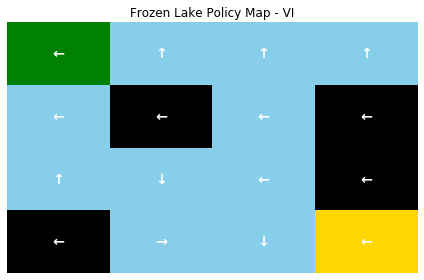

In [388]:
plot = plot_policy_map('Frozen Lake Policy Map - VI', np.array(vi.policy).reshape(4, 4), desc, colors_lake(), directions_lake())

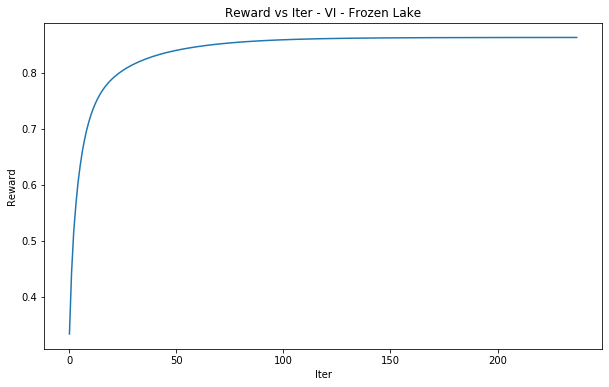

In [389]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Reward vs Iter - VI - Frozen Lake")
g.set_ylabel('Reward')
g.set_xlabel('Iter')
g.plot(rewards_vi)

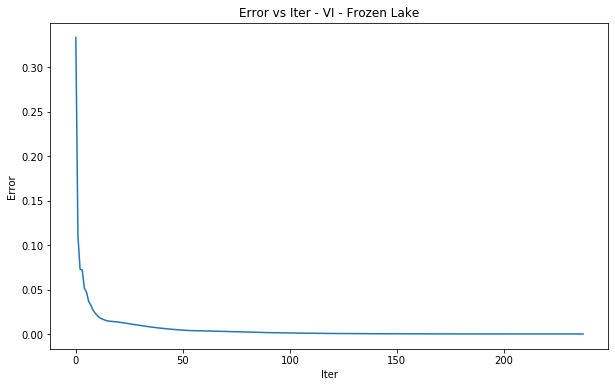

In [390]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - VI - Frozen Lake")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(error_vi)


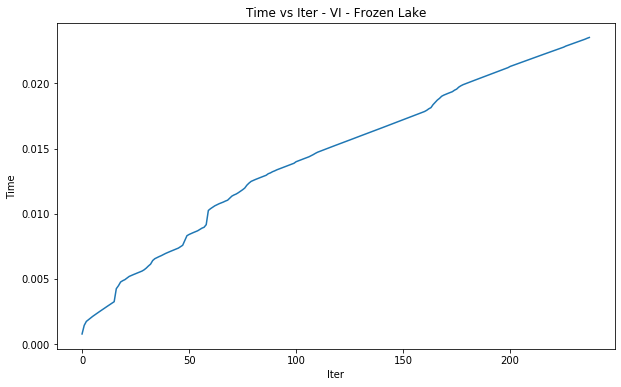

In [391]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Time vs Iter - VI - Frozen Lake")
g.set_ylabel('Time')
g.set_xlabel('Iter')
g.plot(time_vi)


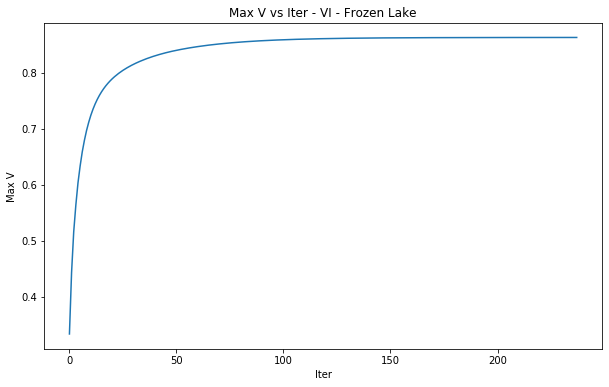

In [392]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Max V vs Iter - VI - Frozen Lake")
g.set_ylabel('Max V')
g.set_xlabel('Iter')
g.plot(maxV_vi)


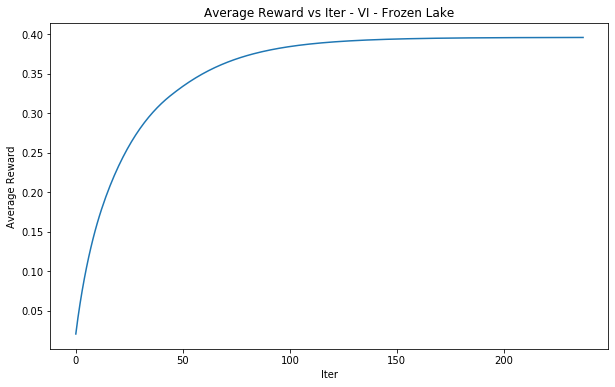

In [393]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Average Reward vs Iter - VI - Frozen Lake")
g.set_ylabel('Average Reward')
g.set_xlabel('Iter')
g.plot(meanV_vi)


# Policy Iteration

In [506]:
pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma=0.99, max_iter=3)
pi.run()

[{'State': None,
  'Action': None,
  'Reward': 0.4975124378109452,
  'Error': 0.16417910447761197,
  'Time': 0.016603946685791016,
  'V[0]': -1.4808977686380113e-16,
  'Max V': 0.4975124378109452,
  'Mean V': 0.05095397846067147,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 0.61655054722087,
  'Error': 0.05938944093900672,
  'Time': 0.01882767677307129,
  'V[0]': 0.052249463051328514,
  'Max V': 0.61655054722087,
  'Mean V': 0.11913825589960389,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 0.8291715994375329,
  'Error': 0.031245668515737485,
  'Time': 0.023166894912719727,
  'V[0]': 0.2219722751877178,
  'Max V': 0.8291715994375329,
  'Mean V': 0.28119337536945166,
  'Iteration': 3}]

In [504]:
stats_pi = pi.run_stats

In [396]:
pi.iter

100

In [507]:
rewards_pi = [i['Reward'] for i in stats_pi]
error_pi = [i['Error'] for i in stats_pi]
time_pi = [i['Time'] for i in stats_pi]
V0_pi = [i['V[0]'] for i in stats_pi]
meanV_pi = [i['Mean V'] for i in stats_pi]


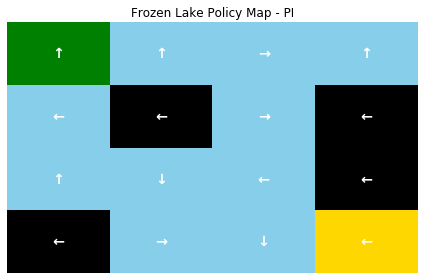

In [508]:
plot = plot_policy_map('Frozen Lake Policy Map - PI', np.array(pi.policy).reshape(4, 4), desc, colors_lake(), directions_lake())

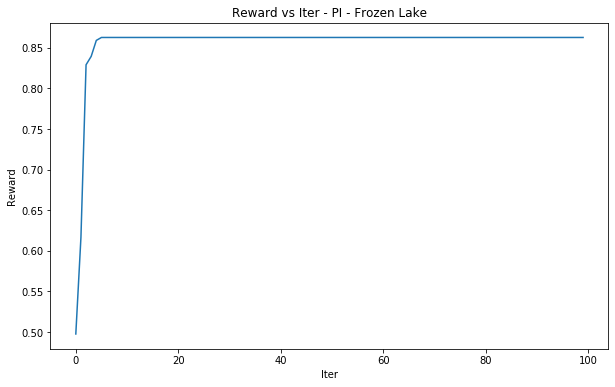

In [399]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Reward vs Iter - PI - Frozen Lake")
g.set_ylabel('Reward')
g.set_xlabel('Iter')
g.plot(rewards_pi)

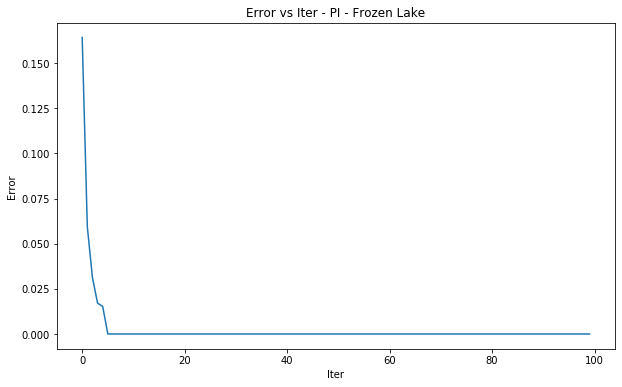

In [400]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - PI - Frozen Lake")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(error_pi)


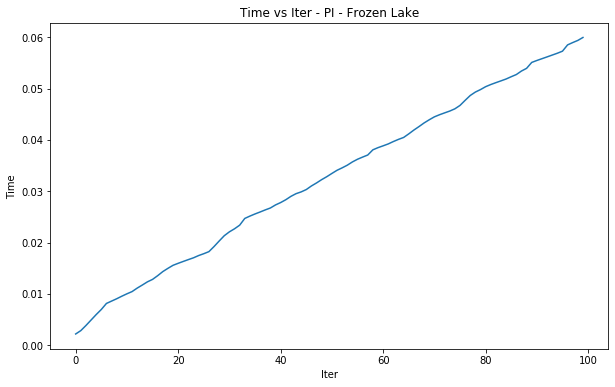

In [401]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Time vs Iter - PI - Frozen Lake")
g.set_ylabel('Time')
g.set_xlabel('Iter')
g.plot(time_pi)


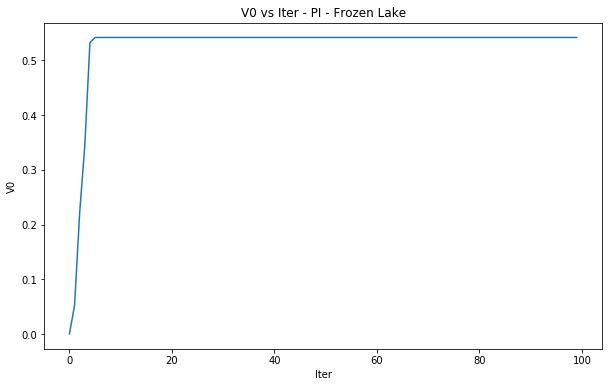

In [402]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("V0 vs Iter - PI - Frozen Lake")
g.set_ylabel('V0')
g.set_xlabel('Iter')
g.plot(V0_pi)

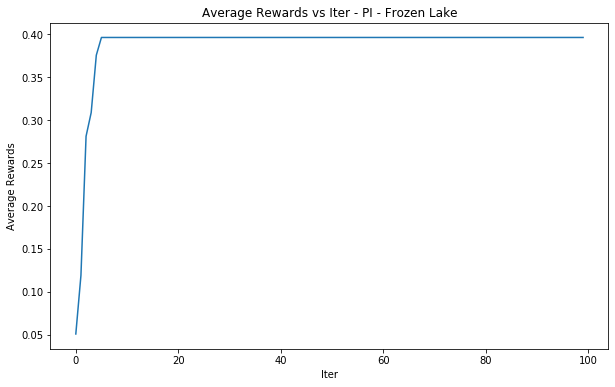

In [403]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Average Rewards vs Iter - PI - Frozen Lake")
g.set_ylabel('Average Rewards')
g.set_xlabel('Iter')
g.plot(meanV_pi)


In [404]:
delta_pi = get_v_variation(stats_pi)

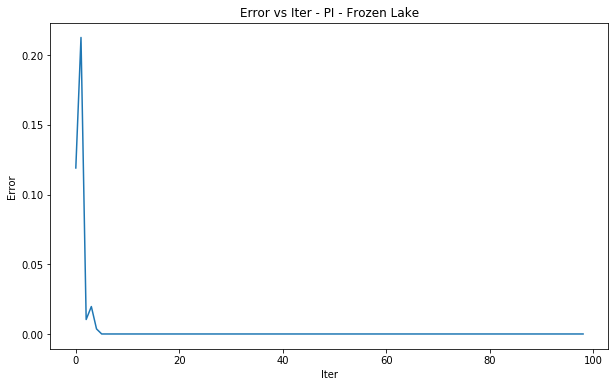

In [405]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - PI - Frozen Lake")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(delta_pi)


# Q-Learning

In [458]:
q = hiive.mdptoolbox.mdp.QLearning(P, R, gamma=0.99, epsilon=0.03, epsilon_decay=1, alpha_decay=1, n_iter=1000000)
q.run()
q.run_stats[-1]['Mean V']


0.4123578194891606

In [505]:
q.time

59.306379079818726

In [459]:
stats_q = q.run_stats

In [460]:
rewards_q = [i['Reward'] for i in stats_q]
error_q = [i['Error'] for i in stats_q]
time_q = [i['Time'] for i in stats_q]
V0_q = [i['V[0]'] for i in stats_q]
maxV_q = [i['Max V'] for i in stats_q]
meanV_q = [i['Mean V'] for i in stats_q]


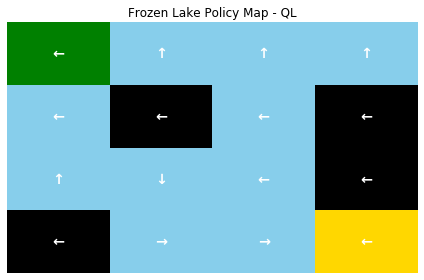

In [486]:
q_ = hiive.mdptoolbox.mdp.QLearning(
    P, R, gamma=0.99, epsilon=0.03, epsilon_decay=1, alpha_decay=1, n_iter=1000001)
q_.run()
plot = plot_policy_map('Frozen Lake Policy Map - QL', np.array(
    q_.policy).reshape(4, 4), desc, colors_lake(), directions_lake())


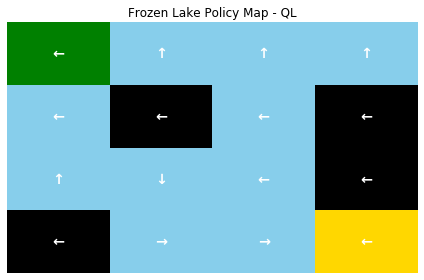

In [487]:
q_ = hiive.mdptoolbox.mdp.QLearning(
    P, R, gamma=0.99, epsilon=0.03, epsilon_decay=1, alpha_decay=1, n_iter=999999)
q_.run()
plot = plot_policy_map('Frozen Lake Policy Map - QL', np.array(
    q_.policy).reshape(4, 4), desc, colors_lake(), directions_lake())

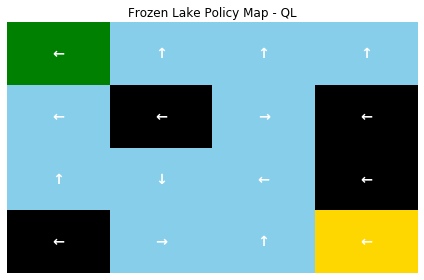

In [485]:
q_ = hiive.mdptoolbox.mdp.QLearning(
    P, R, gamma=0.99, epsilon=0.03, epsilon_decay=1, alpha_decay=1, n_iter=900001)
q_.run()
plot = plot_policy_map('Frozen Lake Policy Map - QL', np.array(
    q_.policy).reshape(4, 4), desc, colors_lake(), directions_lake())


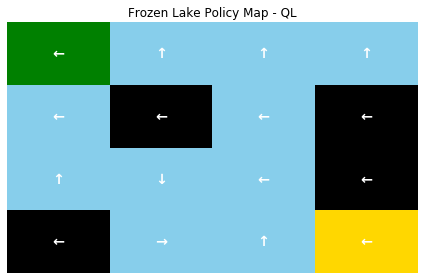

In [477]:
plot = plot_policy_map('Frozen Lake Policy Map - QL', np.array(q.policy).reshape(4, 4), desc, colors_lake(), directions_lake())


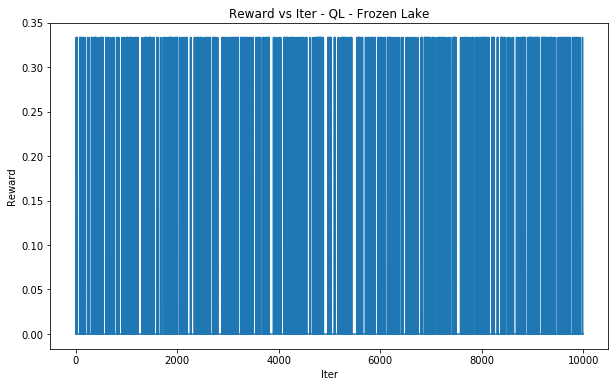

In [462]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Reward vs Iter - QL - Frozen Lake")
g.set_ylabel('Reward')
g.set_xlabel('Iter')
g.plot(rewards_q)

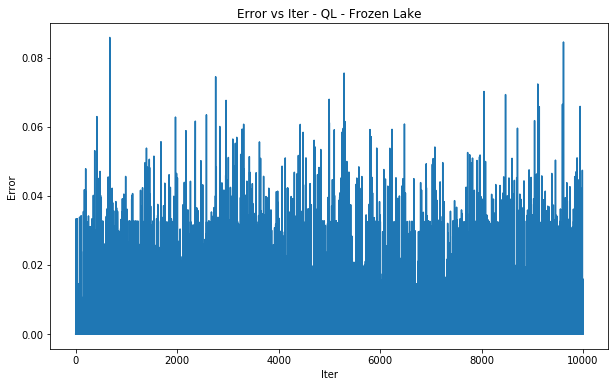

In [463]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - QL - Frozen Lake")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(error_q)


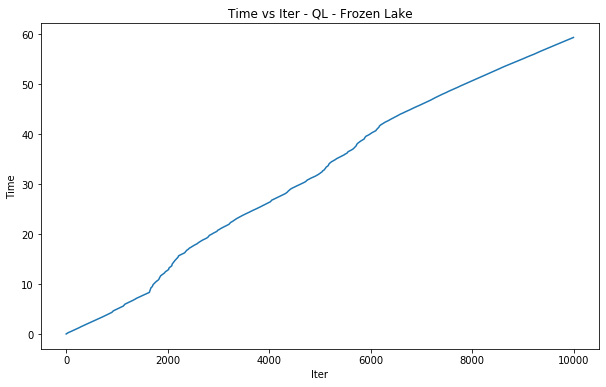

In [464]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Time vs Iter - QL - Frozen Lake")
g.set_ylabel('Time')
g.set_xlabel('Iter')
g.plot(time_q)


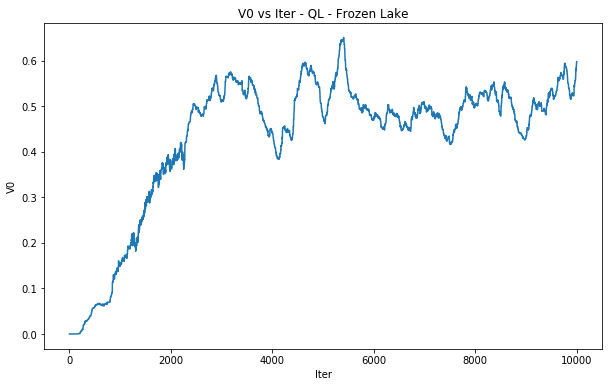

In [465]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("V0 vs Iter - QL - Frozen Lake")
g.set_ylabel('V0')
g.set_xlabel('Iter')
g.plot(V0_q)

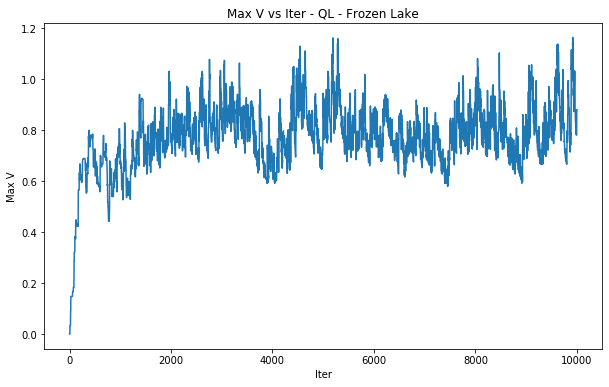

In [466]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Max V vs Iter - QL - Frozen Lake")
g.set_ylabel('Max V')
g.set_xlabel('Iter')
g.plot(maxV_q)


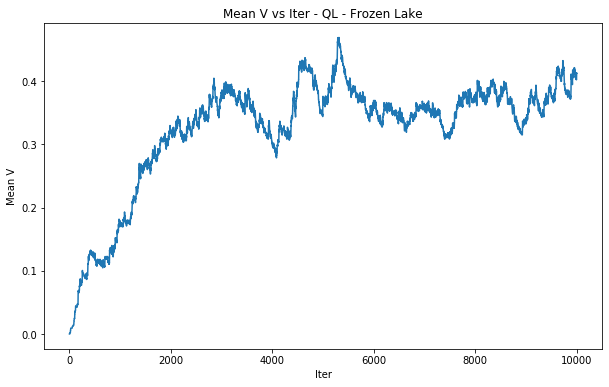

In [467]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Mean V vs Iter - QL - Frozen Lake")
g.set_ylabel('Mean V')
g.set_xlabel('Iter')
g.plot(meanV_q)


In [469]:
delta_q = get_v_variation(stats_q)

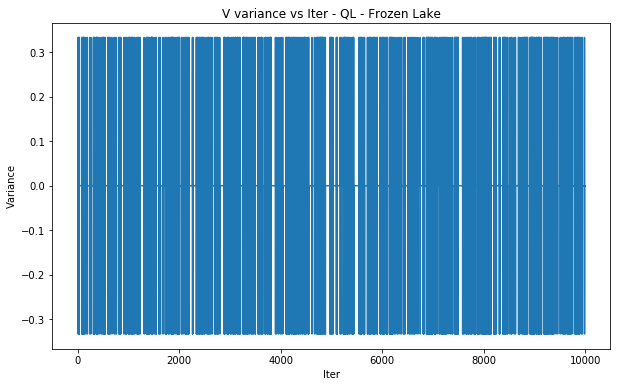

In [474]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("V variance vs Iter - QL - Frozen Lake")
g.set_ylabel('Variance')
g.set_xlabel('Iter')
g.plot(delta_q)


In [468]:
environment = 'FrozenLake-v1'
env_ = gym.make(environment)
env_.reset()
print('VI test score:', test(env_, convertPolicy(env_, vi.policy), 10000))
print('PI test score:', test(env_, convertPolicy(env_, pi.policy), 10000))
print('QL test score:', test(env_, convertPolicy(env_, q.policy), 10000))


VI test score: 0.7311320754716981
PI test score: 0.7546296296296297
QL test score: 0.6290322580645161
